In [114]:
import numpy as np
import pandas as pd
import math 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet,SGDRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import  Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

<h3>Importing the Data<h3
                         >

In [115]:
df = pd.read_csv("data/train.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.01,Premium,G,VS1,62.7,58.0,6.36,6.31,3.97,8.754
1,1,0.60,Good,G,VS2,64.3,57.0,5.31,5.38,3.43,7.492
2,2,1.60,Premium,H,SI2,59.4,59.0,7.55,7.60,4.50,9.010
3,3,0.30,Very Good,J,VS1,63.5,58.0,4.27,4.24,2.70,6.227
4,4,1.00,Very Good,F,SI2,62.8,57.0,6.37,6.44,4.02,8.314


In [116]:
df.drop(['id'], axis=1, inplace= True)


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
 9   price    40455 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.1+ MB


In [118]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [119]:
df.describe()


,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.798543,61.746491,57.455736,5.731269,5.735275,3.539063,7.785853
std,0.475739,1.437124,2.228678,1.125312,1.154908,0.711317,1.016600
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,5.787000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,6.851000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,7.785000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,8.581500
max,5.010000,79.000000,79.000000,10.740000,58.900000,31.800000,9.843000


<h3> After exploring the data..i noticed some diamonds had 0 values in the X, Y or Z columns. So I will drop this data after looking at the correlation Heatmap next.</h3>

In [120]:
df = pd.get_dummies(df)
df

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.01,62.7,58.0,6.36,6.31,3.97,8.754,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.60,64.3,57.0,5.31,5.38,3.43,7.492,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1.60,59.4,59.0,7.55,7.60,4.50,9.010,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.30,63.5,58.0,4.27,4.24,2.70,6.227,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,1.00,62.8,57.0,6.37,6.44,4.02,8.314,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,0.51,62.5,55.0,5.08,5.13,3.19,7.412,0,0,1,...,0,0,0,0,0,0,0,1,0,0
40451,0.80,62.1,54.0,5.96,5.99,3.71,8.016,0,0,1,...,0,0,0,0,0,0,0,1,0,0
40452,1.53,58.7,59.0,7.51,7.45,4.39,9.070,0,0,0,...,0,0,0,0,0,1,0,0,0,0
40453,1.51,61.6,54.0,7.38,7.42,4.57,9.199,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [121]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
2680,1.07,61.6,56.0,0.00,6.62,0.0,8.508,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5230,2.80,63.8,58.0,8.90,8.85,0.0,9.841,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7545,1.01,59.2,58.0,6.50,6.47,0.0,8.252,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8222,1.56,62.2,54.0,0.00,0.00,0.0,9.457,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9446,1.00,63.3,53.0,0.00,0.00,0.0,8.545,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10022,1.01,58.1,59.0,6.66,6.60,0.0,8.061,0,0,0,...,0,0,1,0,0,0,0,0,0,0
15901,0.71,64.1,60.0,0.00,0.00,0.0,7.664,0,1,0,...,0,0,0,0,0,1,0,0,0,0
17496,2.25,62.8,59.0,0.00,0.00,0.0,9.800,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17688,2.18,59.4,61.0,8.49,8.45,0.0,9.444,0,0,0,...,0,0,0,0,0,1,0,0,0,0
20593,2.02,62.7,53.0,8.02,7.95,0.0,9.810,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<h3>Correlation Heatmap</h3>

<AxesSubplot:>

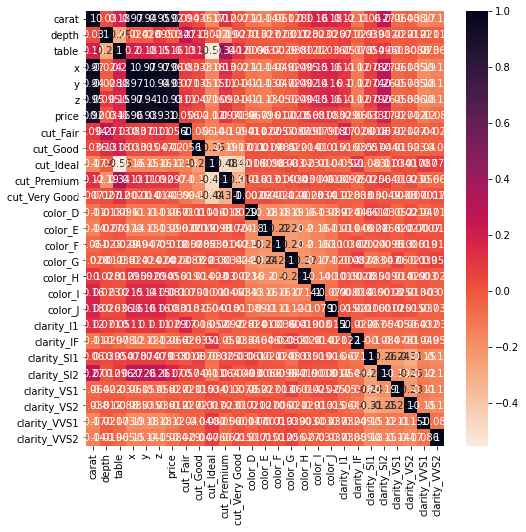

In [122]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot = True, cmap="rocket_r")

<h3>X Y Z seem to have a high correlation with the price of the diamond.  I will drop these columns as well. </h3>

In [123]:
df.drop(['x','y','z'], axis=1, inplace= True)

<h3>Turning the categorical columns into numerical based on the importance over the diamonds price</h3>

In [99]:
clarity = {
    "IF": 8,
    "VVS1": 7,
    "VVS2": 6,
    "VS1": 5,
    "VS2": 4,
    "SI1": 3,
    "SI2": 2,
    "I1": 1
}
df["clarity"] = df.clarity.map(clarity)
df

,carat,cut,color,clarity,depth,table,price
0,1.01,Premium,G,5,62.7,58.0,8.754
1,0.60,Good,G,4,64.3,57.0,7.492
2,1.60,Premium,H,2,59.4,59.0,9.010
3,0.30,Very Good,J,5,63.5,58.0,6.227
4,1.00,Very Good,F,2,62.8,57.0,8.314
...,...,...,...,...,...,...,...
40450,0.51,Ideal,E,4,62.5,55.0,7.412
40451,0.80,Ideal,H,4,62.1,54.0,8.016
40452,1.53,Premium,G,2,58.7,59.0,9.070
40453,1.51,Ideal,I,4,61.6,54.0,9.199


In [100]:
cut = {
    "Ideal": 5,
    "Premium": 4,
    "Very Good": 3,
    "Good": 2,
    "Fair": 1
}
df["cut"] = df.cut.map(cut)
df

,carat,cut,color,clarity,depth,table,price
0,1.01,4,G,5,62.7,58.0,8.754
1,0.60,2,G,4,64.3,57.0,7.492
2,1.60,4,H,2,59.4,59.0,9.010
3,0.30,3,J,5,63.5,58.0,6.227
4,1.00,3,F,2,62.8,57.0,8.314
...,...,...,...,...,...,...,...
40450,0.51,5,E,4,62.5,55.0,7.412
40451,0.80,5,H,4,62.1,54.0,8.016
40452,1.53,4,G,2,58.7,59.0,9.070
40453,1.51,5,I,4,61.6,54.0,9.199


In [101]:
color = {
    "D": 7,
    "E": 6,
    "F": 5,
    "G": 4,
    "H": 3,
    "I": 2,
    "J": 1
}
df["color"] = df.color.map(color)
df

,carat,cut,color,clarity,depth,table,price
0,1.01,4,4,5,62.7,58.0,8.754
1,0.60,2,4,4,64.3,57.0,7.492
2,1.60,4,3,2,59.4,59.0,9.010
3,0.30,3,1,5,63.5,58.0,6.227
4,1.00,3,5,2,62.8,57.0,8.314
...,...,...,...,...,...,...,...
40450,0.51,5,6,4,62.5,55.0,7.412
40451,0.80,5,3,4,62.1,54.0,8.016
40452,1.53,4,4,2,58.7,59.0,9.070
40453,1.51,5,2,4,61.6,54.0,9.199


<h3>Gridsearch with a Random Forrest Model has the best Results</h3>

In [124]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=27)

In [125]:
models = { "ridge": Ridge(),
          "lasso": Lasso(),
          "sgd": SGDRegressor(),
          "knn": KNeighborsRegressor(),
          "gradient": GradientBoostingRegressor()
}

In [126]:
for name, model in models.items():
    print(f"Entrenando modelo ---> {name}")
    model.fit(X_train,y_train)
    print(f"He acabado :)")

Entrenando modelo ---> ridge
He acabado :)
Entrenando modelo ---> lasso
He acabado :)
Entrenando modelo ---> sgd
He acabado :)
Entrenando modelo ---> knn
He acabado :)
Entrenando modelo ---> gradient
He acabado :)


In [127]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"--------{name}--------")
    print("MAE: ", mean_absolute_error(y_test, y_pred))
    print("MSE: ", mean_squared_error(y_test,y_pred))
    print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))
    print("R2: ", r2_score(y_test,y_pred))
    print("\n")

--------ridge--------
MAE:  0.265290823272136
MSE:  0.11279397889081008
RMSE:  0.33584814855944956
R2:  0.890302528757542


--------lasso--------
MAE:  0.8759915795304806
MSE:  1.0284374797511733
RMSE:  1.0141190658651347
R2:  -0.00020401770632183513


--------sgd--------
MAE:  93862981.27545708
MSE:  1.6201742383086436e+16
RMSE:  127286065.15674226
R2:  -1.5756959605679288e+16


--------knn--------
MAE:  0.35561777733834293
MSE:  0.25564615796321927
RMSE:  0.5056146338499503
R2:  0.7513720383198577


--------gradient--------
MAE:  0.09445546501772031
MSE:  0.014635974360588987
RMSE:  0.1209792311125715
R2:  0.9857658237406423




In [ ]:
model = RandomForestRegressor()

params = {'n_estimators': [400, 450],
          'max_features': [0.5],
          'max_depth': [30,50,55],
          'min_samples_leaf': [1,4,5,6]}

grid_search = GridSearchCV(model, param_grid=params, verbose=1, n_jobs=-1,cv=5)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [107]:
bestscore = grid_search.best_score_
print("Best GridSearch Score: ", bestscore)
best_rf = grid_search.best_estimator_
print("Best Estimator: ", best_rf)
print("Best RF SCORE: ", best_rf.score(X, y))


Best GridSearch Score:  0.9895100204791181
Best Estimator:  RandomForestRegressor(max_depth=30, max_features=0.5, min_samples_leaf=4,
                      n_estimators=450)
Best RF SCORE:  0.9926867699054495


<h3>Predicting the Test Data</h3>

In [108]:
dftest = pd.read_csv("data/test.csv")
dftest

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,2.01,Ideal,H,SI1,61.9,57.0,8.14,8.05,5.01
1,1,0.49,Good,D,VS1,57.5,60.0,5.18,5.25,3.00
2,2,1.03,Premium,F,SI1,58.6,62.0,6.65,6.60,3.88
3,3,0.90,Very Good,E,SI1,63.0,56.0,6.11,6.15,3.86
4,4,0.59,Ideal,D,SI1,62.5,55.0,5.35,5.40,3.36
...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.41,Good,F,I1,63.8,57.0,4.72,4.69,3.00
13481,13481,2.05,Very Good,H,VS2,63.5,62.0,8.05,7.91,5.07
13482,13482,2.22,Premium,I,VS2,60.5,59.0,8.41,8.37,5.08
13483,13483,0.51,Ideal,E,SI2,58.3,62.0,5.20,5.19,3.04


In [109]:
dftest.drop(['id'], axis=1, inplace= True)
dftest.drop(['x','y','z'], axis=1, inplace= True)
dftest = pd.get_dummies(dftest)

In [110]:
dftest["clarity"] = dftest.clarity.map(clarity)
dftest["cut"] = dftest.cut.map(cut)
dftest["color"] = dftest.color.map(color)


In [111]:
dftest["price"] = best_rf.predict(dftest)
dftest

,carat,cut,color,clarity,depth,table,price
0,2.01,5,3,3,61.9,57.0,9.704726
1,0.49,2,7,5,57.5,60.0,7.244226
2,1.03,4,5,3,58.6,62.0,8.552911
3,0.90,3,6,3,63.0,56.0,8.342699
4,0.59,5,7,3,62.5,55.0,7.485290
...,...,...,...,...,...,...,...
13480,0.41,2,5,1,63.8,57.0,6.450072
13481,2.05,3,3,4,63.5,62.0,9.659024
13482,2.22,4,2,4,60.5,59.0,9.745172
13483,0.51,5,6,2,58.3,62.0,7.086718


In [112]:
dfsubmit = dftest[["price"]]
dfsubmit.index.name = 'id'

In [113]:
dfsubmit.to_csv("submit.csv", index = True)